In [1]:
from IPython.display import display, HTML

display(HTML("""
<h1 style="
    font-family: 'Comic Sans MS', 'Brush Script MT', cursive;
    color: #0D47A1;   /* Dark Blue */
    text-shadow: 2px 2px 6px #90A4AE;  /* Soft grey-blue shadow */
    text-align: center;
">
Power-Press Machine Safety & Automation (RANDOM FOREST)
</h1>
"""))

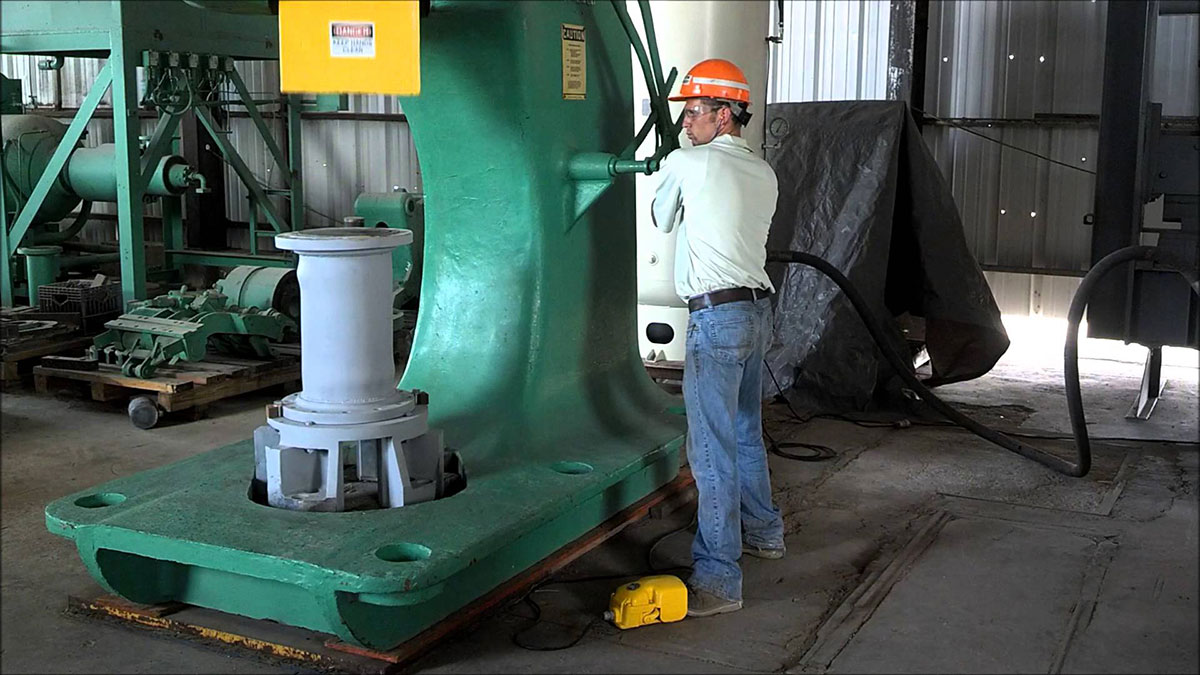

In [2]:
from IPython.display import Image, display

display(Image(filename='power-press.jpg'))


In [3]:
from IPython.display import display, HTML

safety_html = """
<div style="border:3px solid #1E2A38; border-radius:16px; padding:22px;
            background: linear-gradient(135deg, #121920, #1E2A38, #2C3A50);
            color:#E1F5FE; font-family:Arial, sans-serif; line-height:1.6">

  <h2 style="color:#81D4FA; text-align:center; margin-top:0; text-shadow:1px 1px 2px #000;">
  ⚙️ Power-Press Machine Safety & Automation (Crushed 2025)</h2>

  <p>
    Power-press machines are widely used in automotive component manufacturing, 
    but they are also one of the leading causes of industrial <b>crush injuries in India</b>. 
    The <b>Crushed 2025 report</b> shows that most accidents occur due to defective machines, 
    missing safety features, poor maintenance, and ignored warnings.
  </p>

  <h3 style="color:#4FC3F7;">🔹 Key Issues Identified</h3>
  <ul>
    <li><b>Mechanical Failures:</b> Loose or broken pins, keys, springs, and damaged paddles cause <b>double strokes</b> (unintended second press).</li>
    <li><b>Lack of Safety Systems:</b> ~94% of injured workers operated machines without interlocks (sensors, guards, light curtains).</li>
    <li><b>Neglected Maintenance:</b> Daily inspections skipped; most repairs are reactive after breakdowns.</li>
    <li><b>Ignored Warnings:</b> Malfunctions reported but overlooked due to <b>production pressures</b>.</li>
  </ul>

  <h3 style="color:#29B6F6;">🔹 Automation Safety Concepts</h3>
  <ul>
    <li><b>Safety Interlocks & Guards:</b> Prevent operation if guards are open or unsafe conditions are detected.</li>
    <li><b>Error Detection & Monitoring:</b> Real-time monitoring of cycle count, force, vibration, and sensors to catch failures early.</li>
    <li><b>Predictive & Preventive Maintenance:</b> IoT-based analytics + scheduled inspections detect worn parts before failure.</li>
    <li><b>Emergency Stop & Safe Control Logic:</b> Reliable E-Stops and logic to block repeated strokes without reset confirmation.</li>
    <li><b>Human–Machine Interface & Training:</b> Clear alarms, live machine status, and lockout if safety devices are bypassed.</li>
  </ul>

  <h3 style="color:#03A9F4;">🔹 Lessons for Industry 4.0</h3>
  <p>
    By integrating <b>sensors, safety PLCs, IoT monitoring, and predictive analytics</b>, 
    power-press machines can drastically reduce accidents. 
    Automation must <b>improve productivity</b> while enforcing <b>worker safety as a non-negotiable priority</b>.
  </p>

</div>
"""

display(HTML(safety_html))


In [4]:
from IPython.display import display, HTML

display(HTML("""
<h1 style="
    font-family: 'Comic Sans MS', 'Brush Script MT', cursive;
    color: #0D47A1;   /* Dark Blue */
    text-shadow: 2px 2px 6px #90A4AE;  /* Soft grey-blue shadow */
    text-align: center;
">
EDA STEPS
</h1>
"""))

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## LOAD DATASET

In [6]:
df = pd.read_csv("power_press_safety_dataset.csv")

In [7]:
df.head()

,vibration,pressure,force,stroke_cycle_time,motor_current,temperature,replaced_parts,failures_frequency,downtime,reported_warnings,safety_bypass,status
0,5.75,105.37,372.45,2.23,23.75,54.80,4,5,1.40,2,1,failure
1,4.79,108.41,452.05,1.72,17.94,51.47,1,1,0.31,2,0,safe
2,5.97,116.25,500.42,2.26,20.38,45.42,2,6,0.78,2,1,failure
3,7.28,115.81,503.76,2.41,18.15,40.47,4,2,1.30,0,0,failure
4,4.65,79.33,463.99,2.12,18.26,49.89,4,2,0.11,2,1,failure


In [8]:
df.tail()

,vibration,pressure,force,stroke_cycle_time,motor_current,temperature,replaced_parts,failures_frequency,downtime,reported_warnings,safety_bypass,status
195,5.58,92.96,459.20,2.32,18.88,48.08,3,7,1.38,1,0,failure
196,3.67,74.30,478.41,1.99,27.19,44.86,3,7,0.34,2,0,failure
197,5.23,120.31,421.70,2.20,22.56,48.87,4,6,1.55,0,0,safe
198,5.09,98.28,464.46,2.01,17.72,46.57,3,6,0.12,0,0,safe
199,3.29,118.57,530.18,2.01,22.29,54.55,1,5,0.44,1,0,safe


In [9]:
df.shape

(200, 12)

In [10]:
df.columns

Index(['vibration', 'pressure', 'force', 'stroke_cycle_time', 'motor_current',
       'temperature', 'replaced_parts', 'failures_frequency', 'downtime',
       'reported_warnings', 'safety_bypass', 'status'],
      dtype='object')

In [11]:
df.dtypes

vibration             float64
pressure              float64
force                 float64
stroke_cycle_time     float64
motor_current         float64
temperature           float64
replaced_parts          int64
failures_frequency      int64
downtime              float64
reported_warnings       int64
safety_bypass           int64
status                 object
dtype: object

In [12]:
df.isnull().sum()

vibration             0
pressure              0
force                 0
stroke_cycle_time     0
motor_current         0
temperature           0
replaced_parts        0
failures_frequency    0
downtime              0
reported_warnings     0
safety_bypass         0
status                0
dtype: int64

# Statistical Analysis

In [13]:
df.describe()

,vibration,pressure,force,stroke_cycle_time,motor_current,temperature,replaced_parts,failures_frequency,downtime,reported_warnings,safety_bypass
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,4.938950,101.287950,493.147550,2.002750,20.513150,45.935650,1.975000,4.455000,0.957900,1.085000,0.135000
std,1.396553,14.805145,79.523343,0.305507,3.823753,7.212393,1.422848,2.806664,0.900543,0.819226,0.342581
min,1.070000,51.380000,302.270000,1.190000,10.300000,24.730000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.945000,90.915000,436.490000,1.790000,17.880000,41.467500,1.000000,2.000000,0.260000,0.000000,0.000000
50%,4.995000,101.185000,493.790000,2.010000,20.520000,46.385000,2.000000,4.000000,0.720000,1.000000,0.000000
75%,5.755000,110.305000,545.767500,2.202500,22.877500,51.115000,3.000000,7.000000,1.372500,2.000000,0.000000
max,9.080000,157.790000,746.310000,2.790000,30.110000,62.080000,4.000000,9.000000,4.720000,2.000000,1.000000


# UNIVARIATE ANALYSIS

## Histogram for numerical analysis

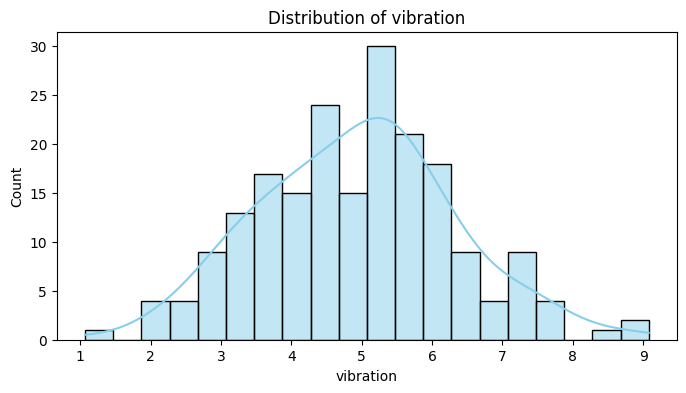

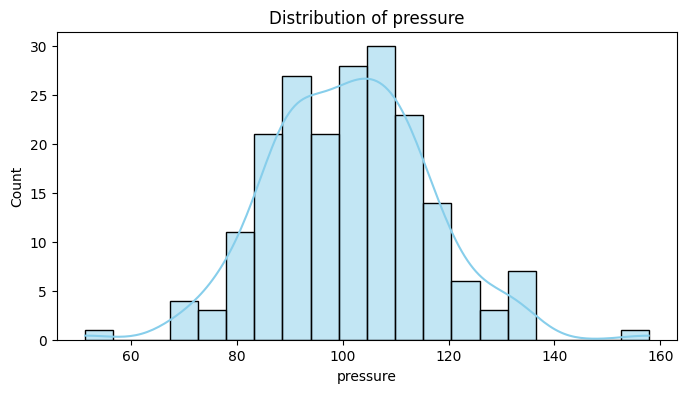

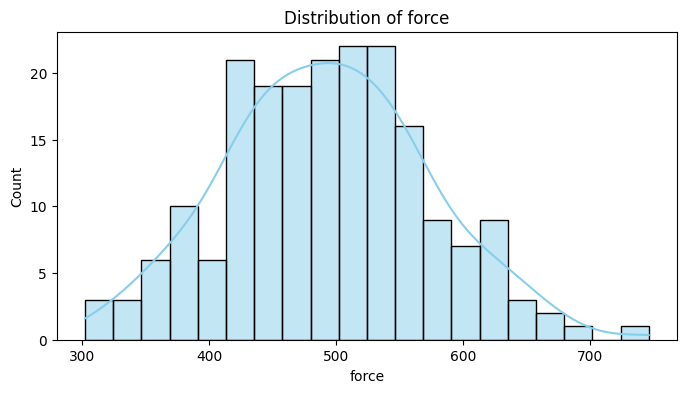

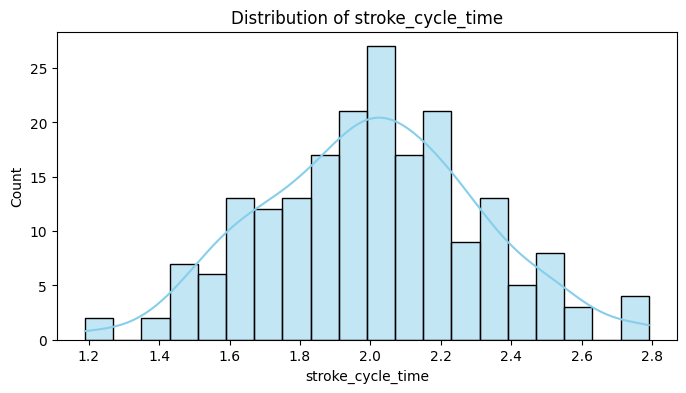

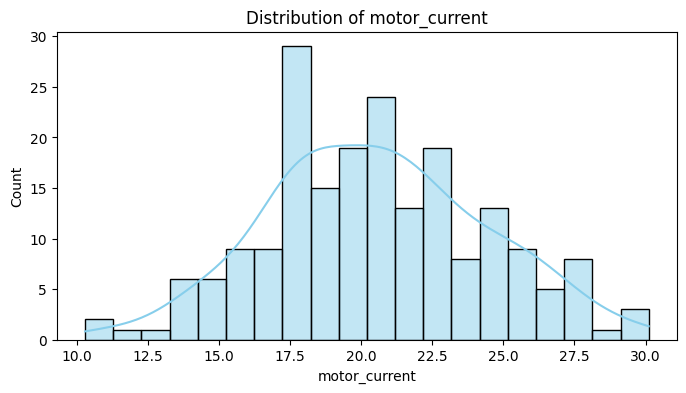

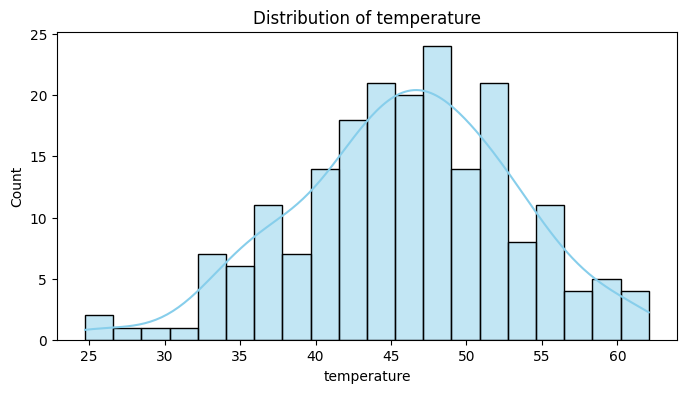

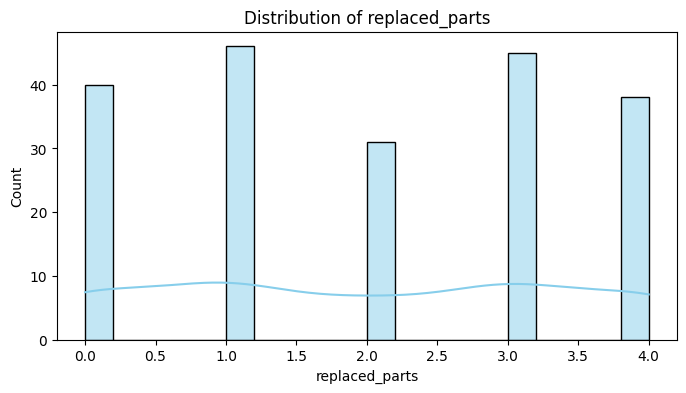

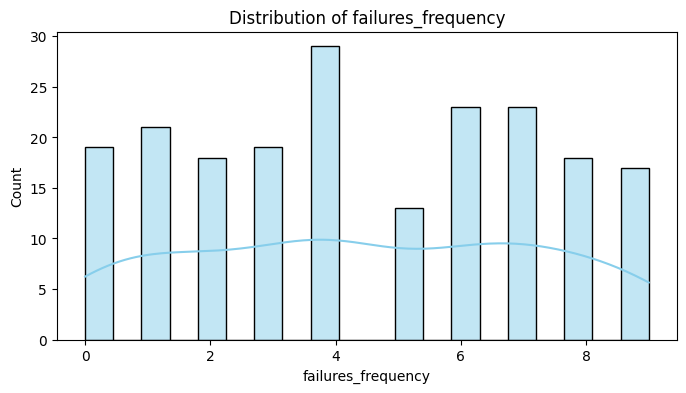

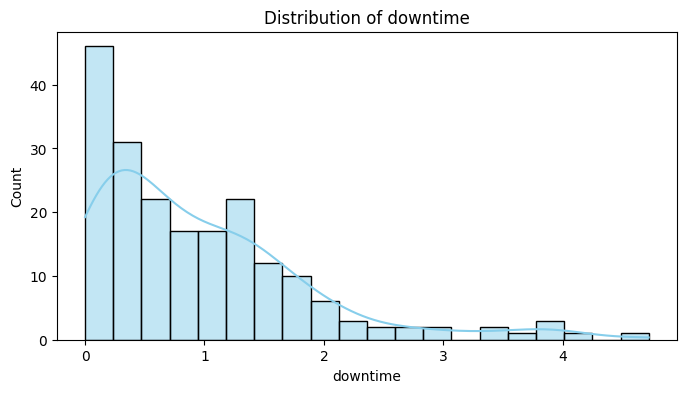

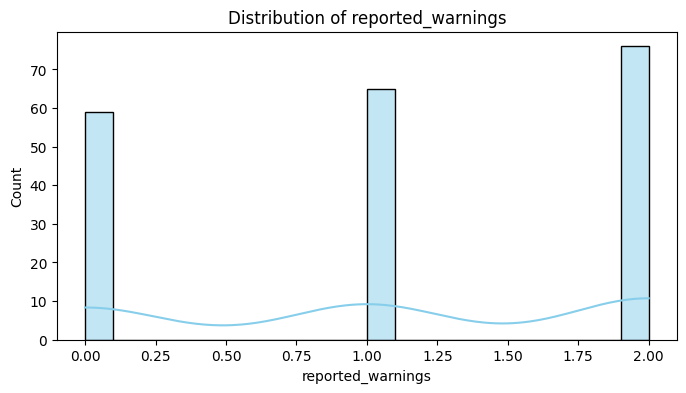

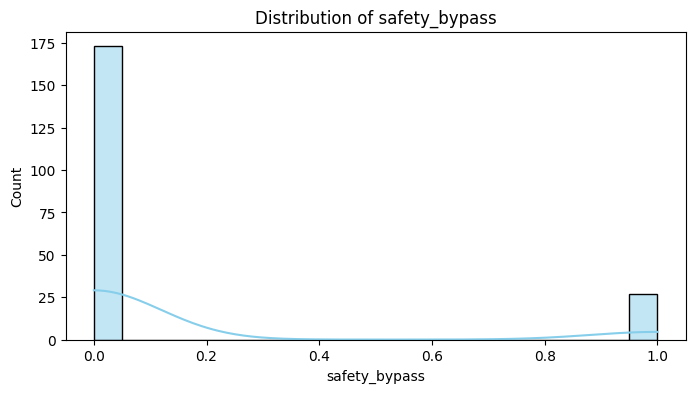

In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

## Countplot for categorical columns

C:\Users\vaish\AppData\Local\Temp\ipykernel_2876\1363930088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="cool")


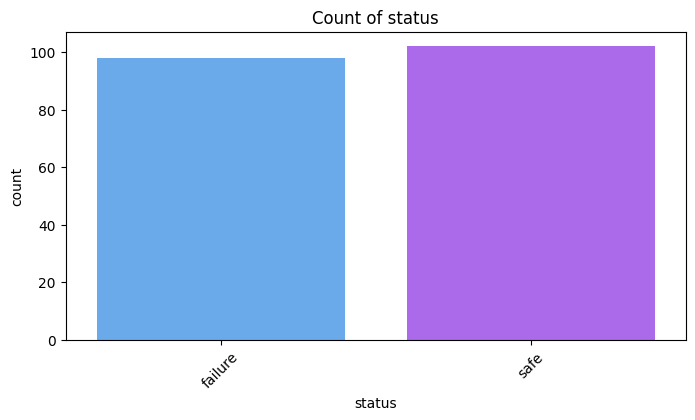

In [15]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, palette="cool")
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

# BIVARIATE ANALYSIS

## Scatterplot between numerical variables

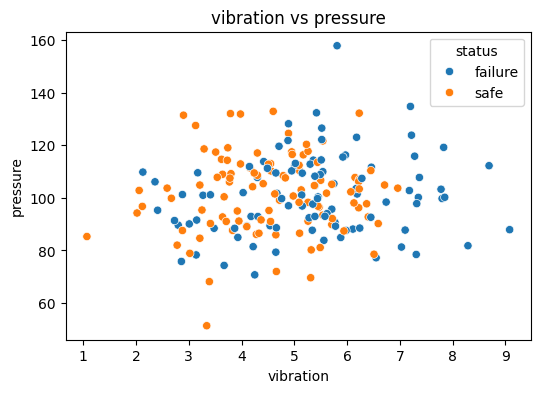

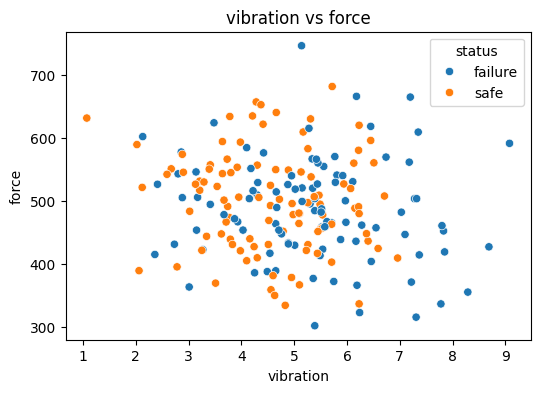

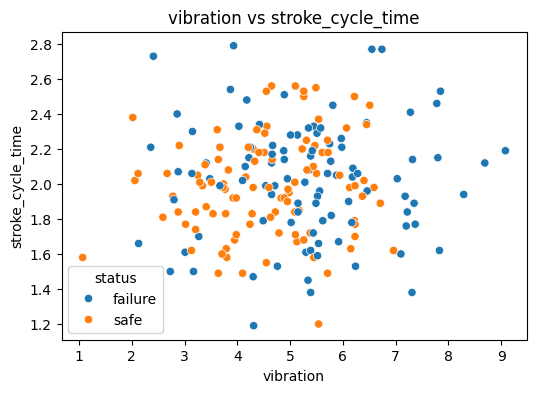

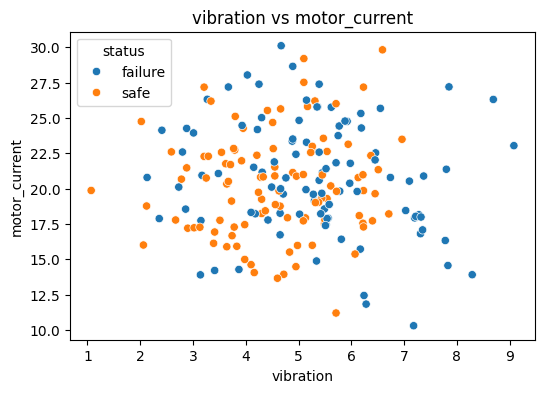

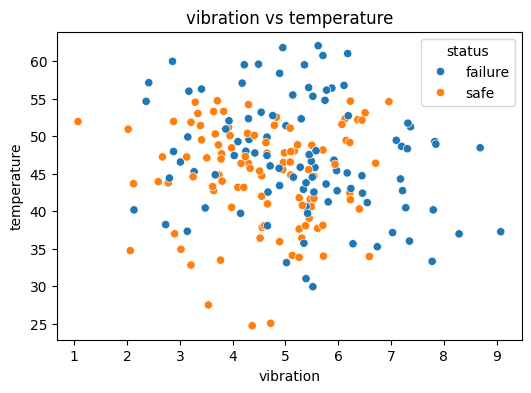

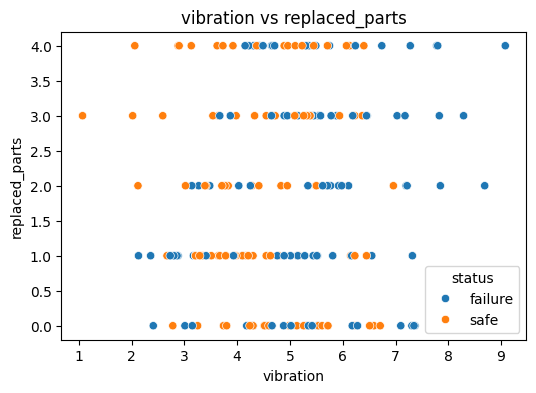

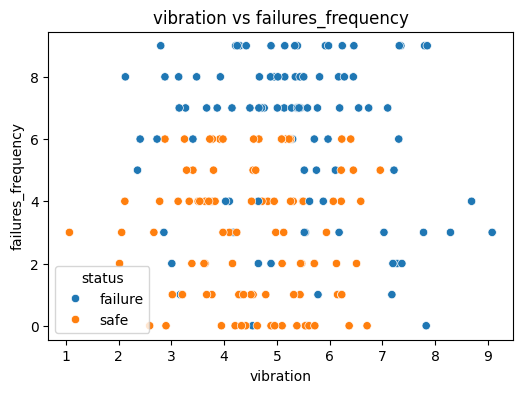

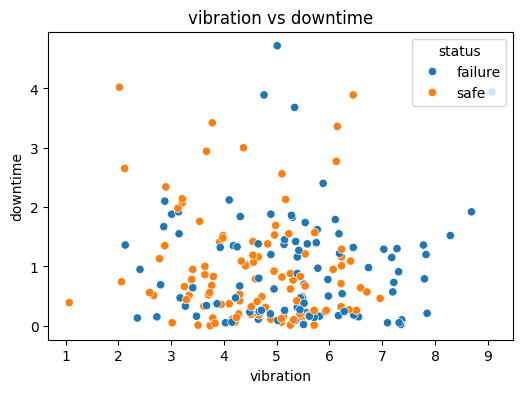

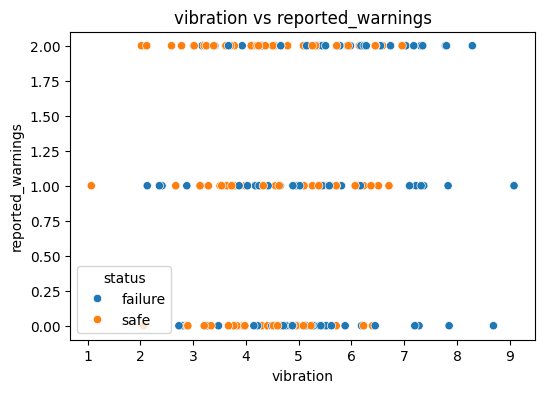

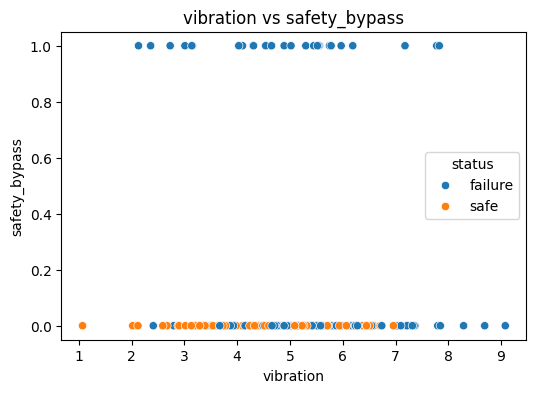

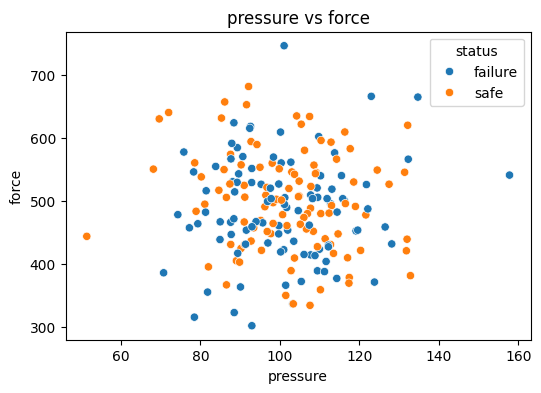

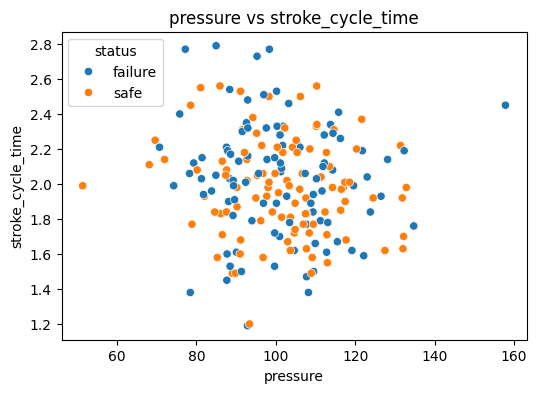

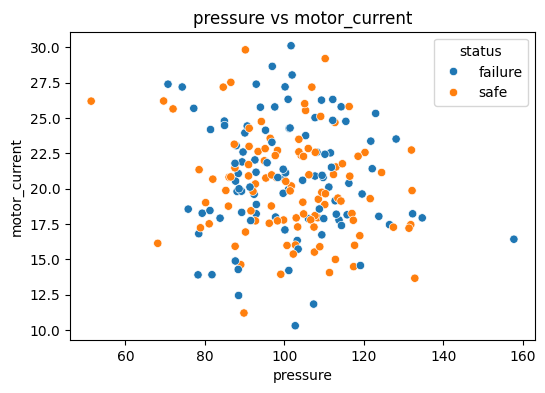

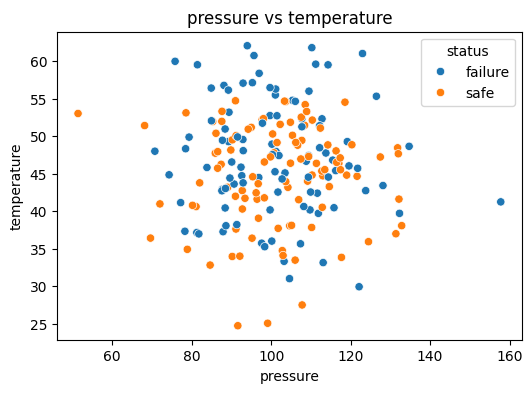

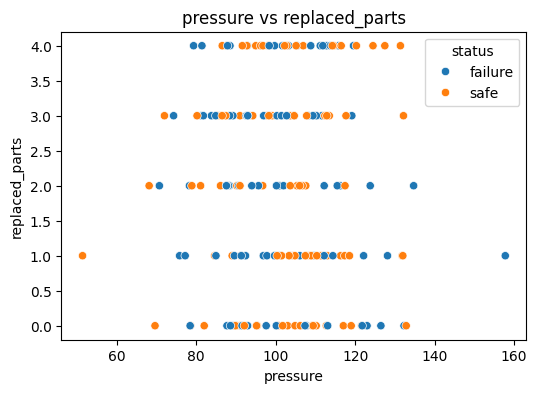

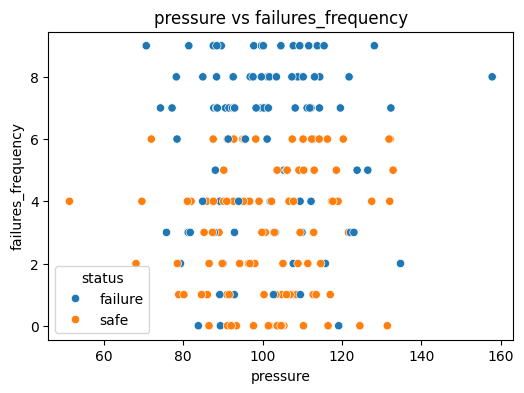

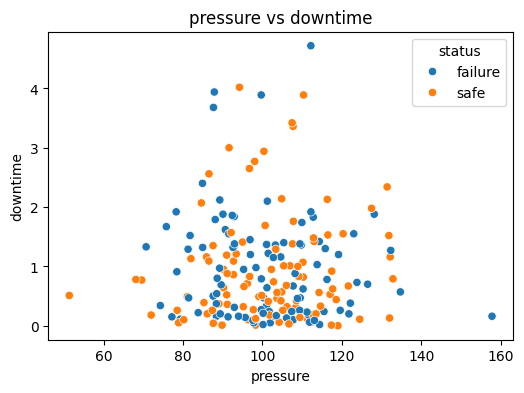

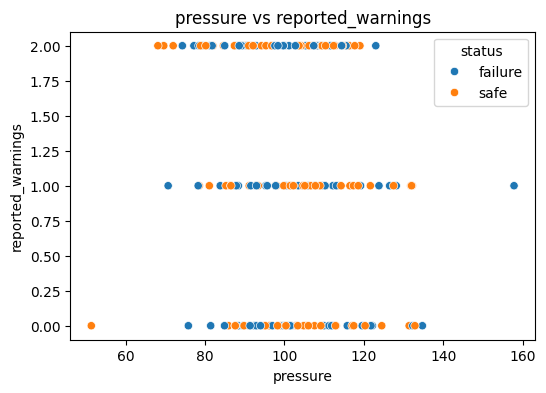

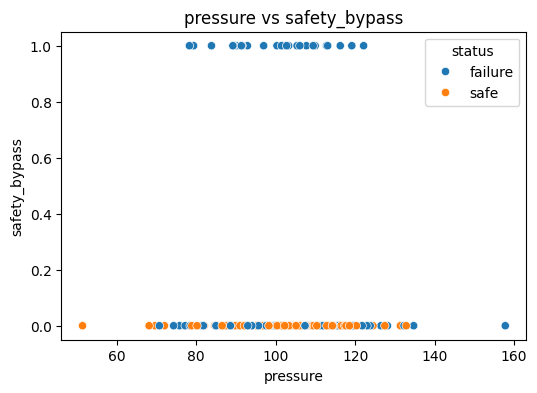

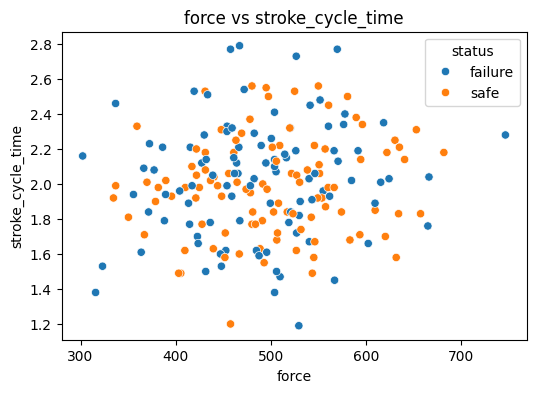

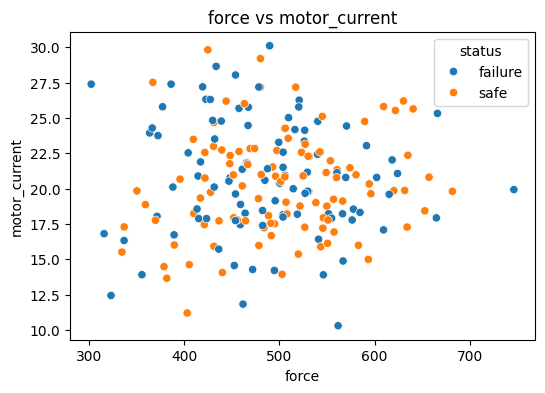

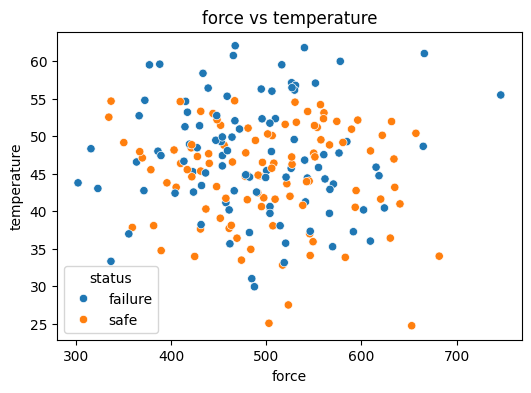

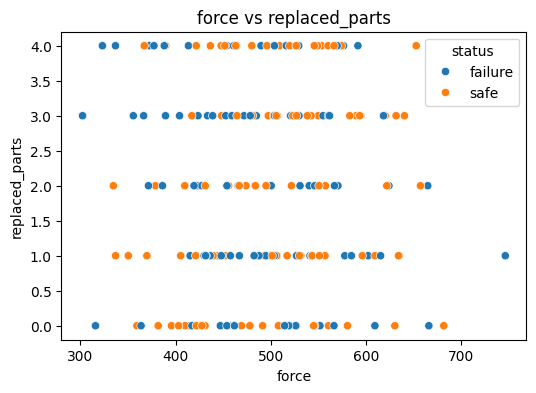

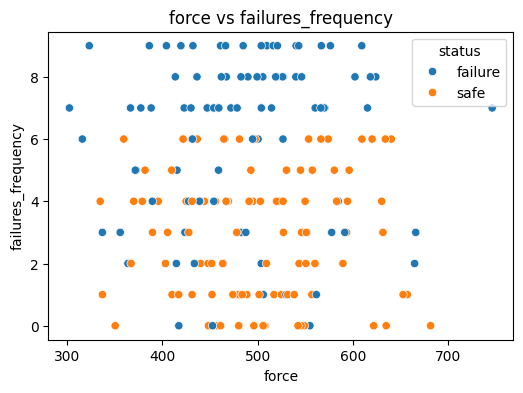

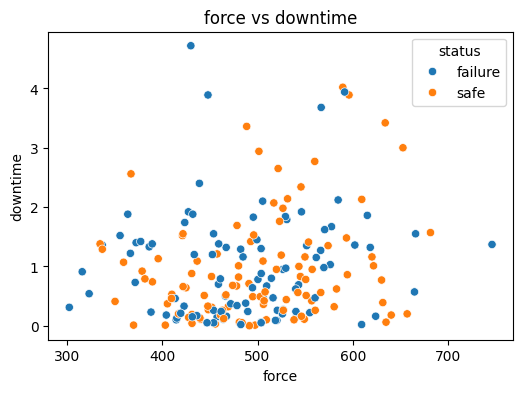

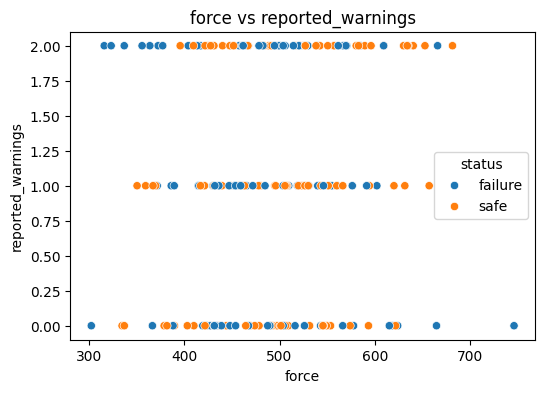

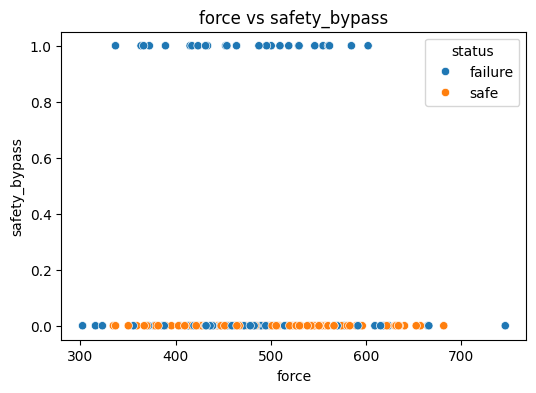

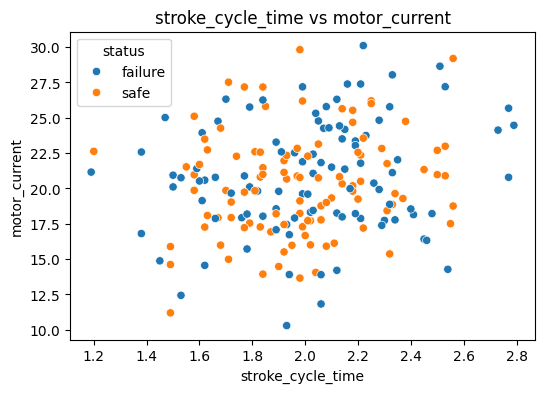

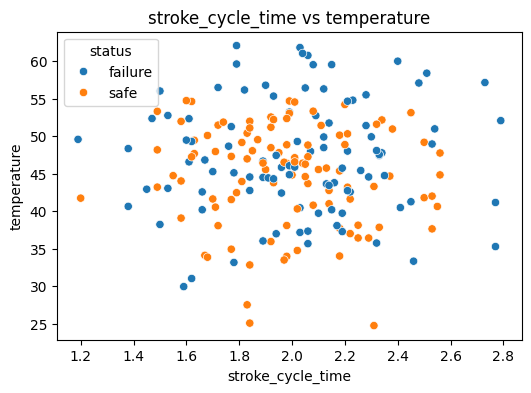

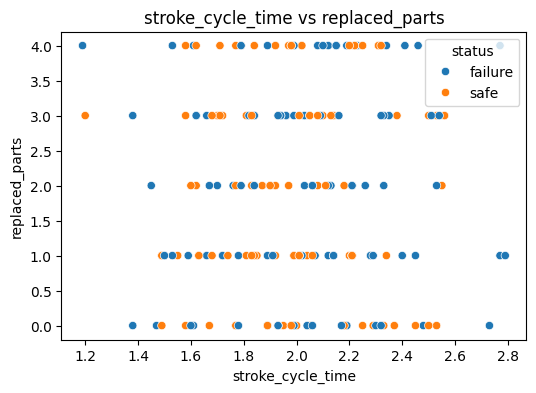

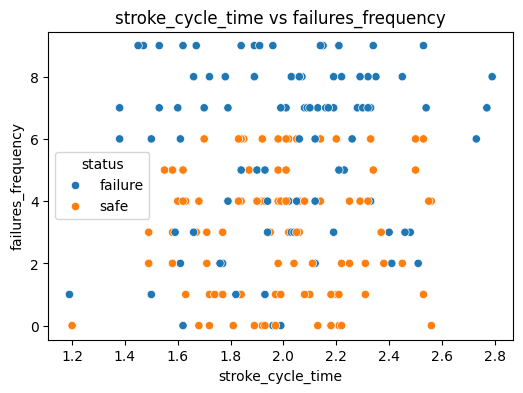

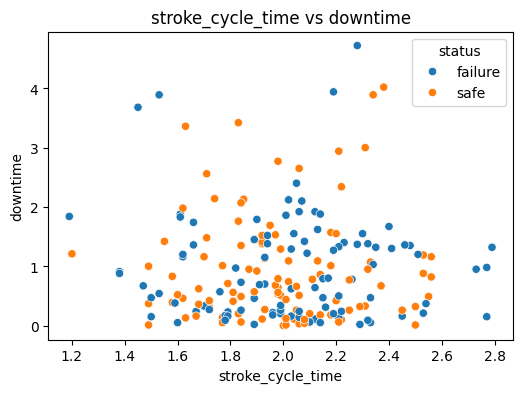

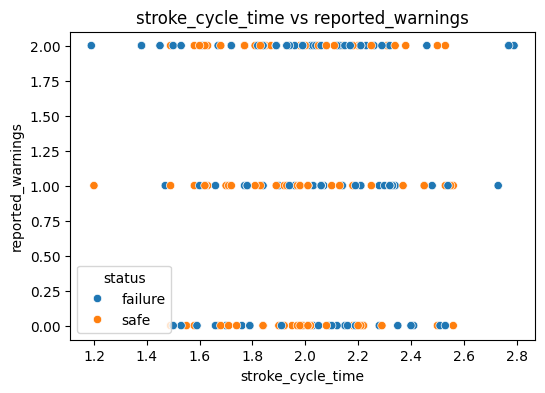

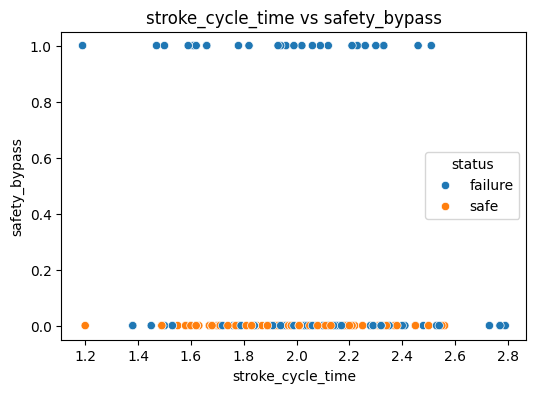

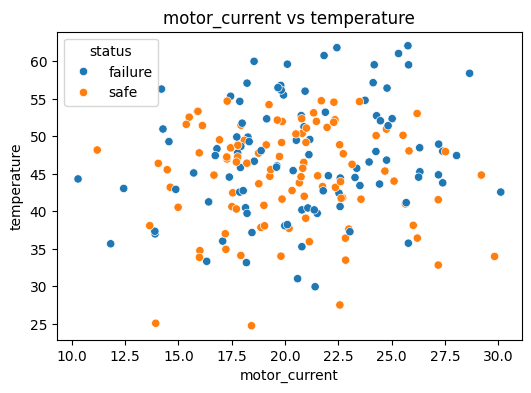

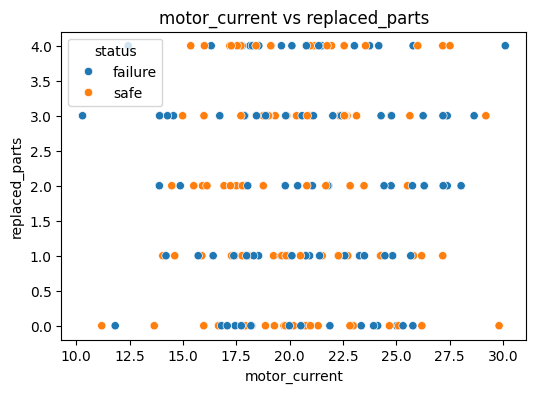

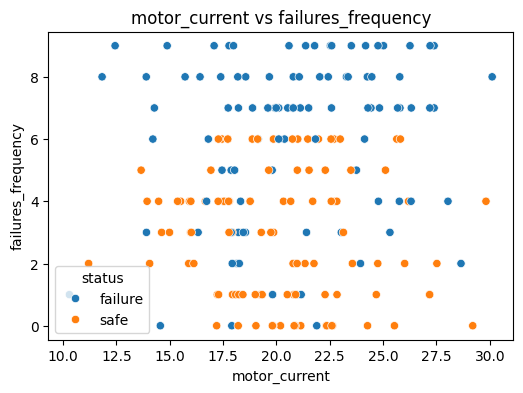

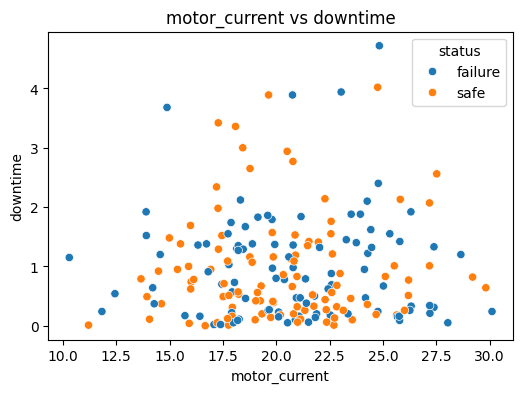

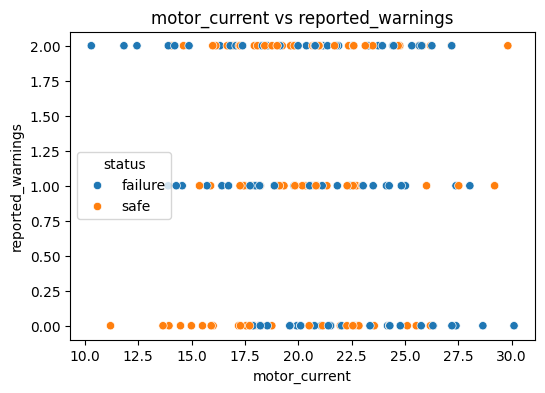

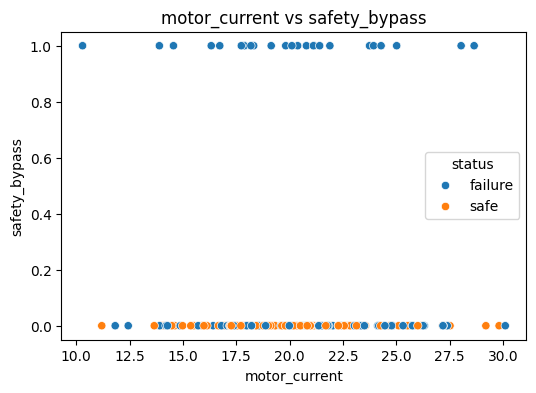

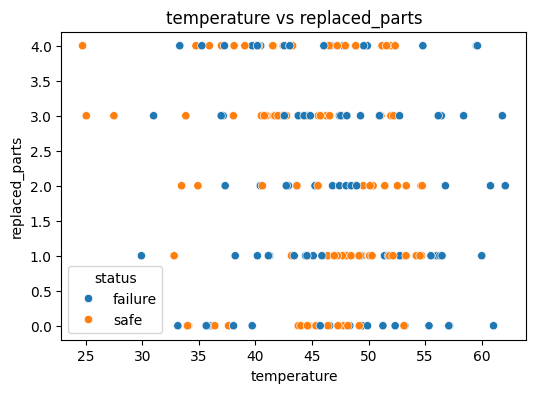

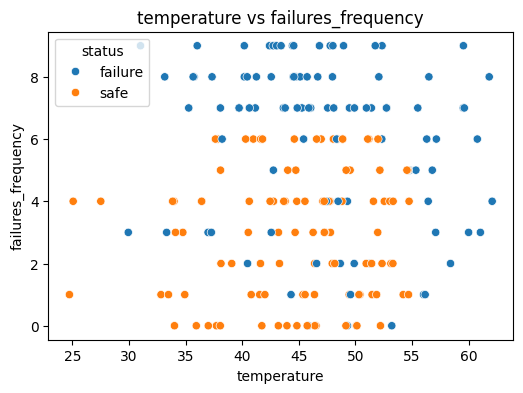

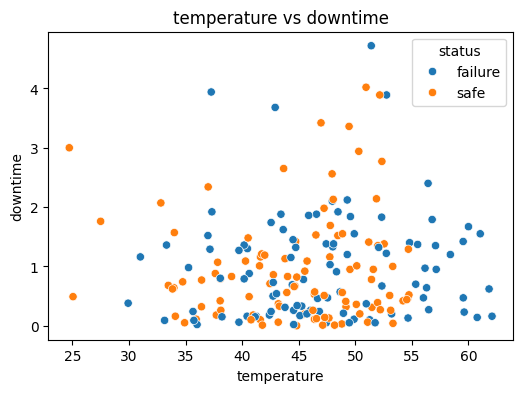

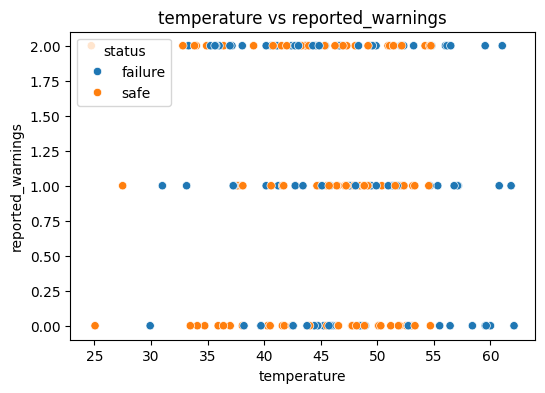

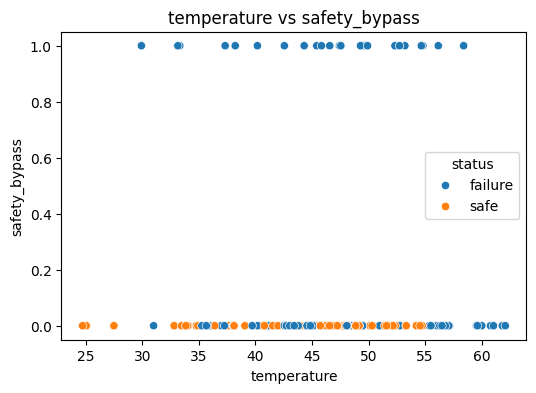

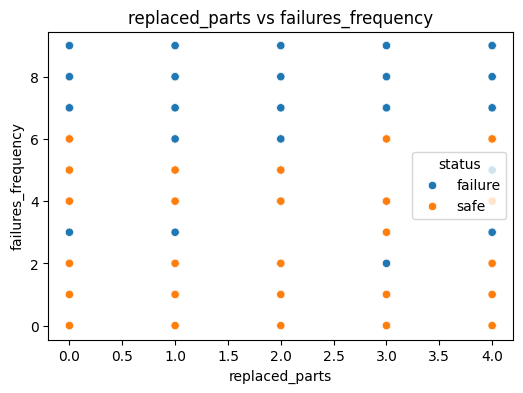

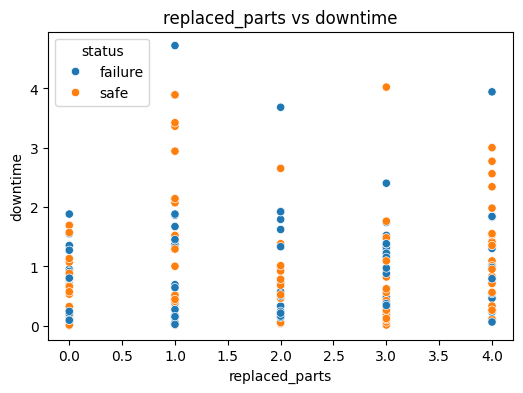

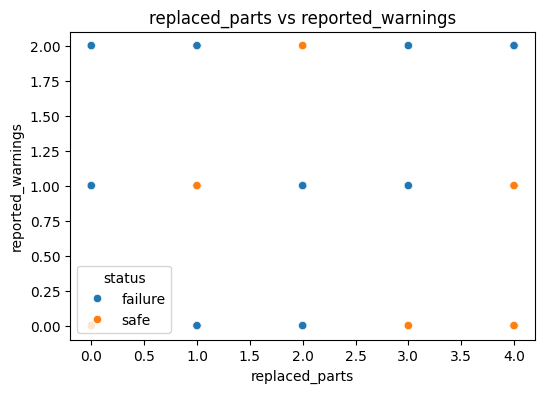

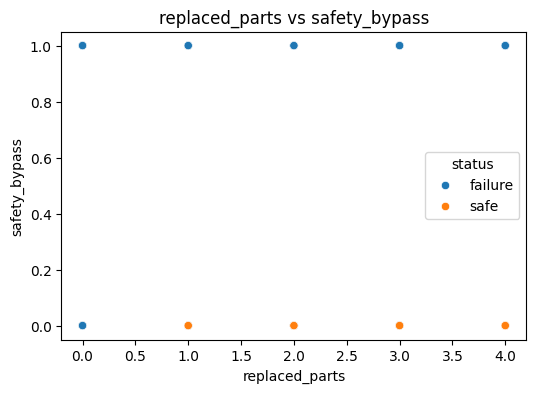

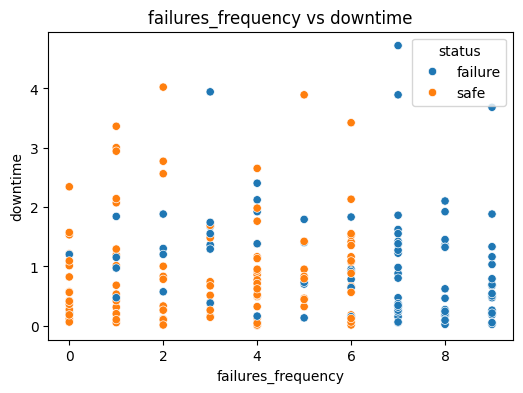

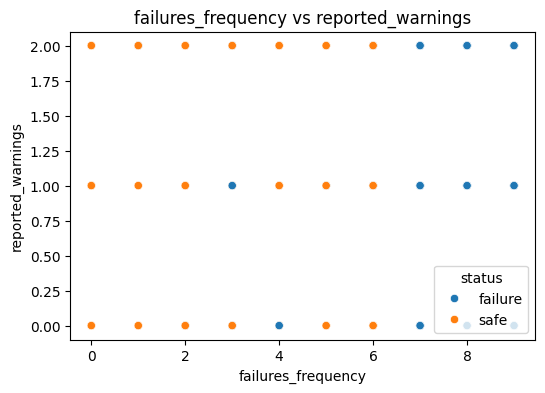

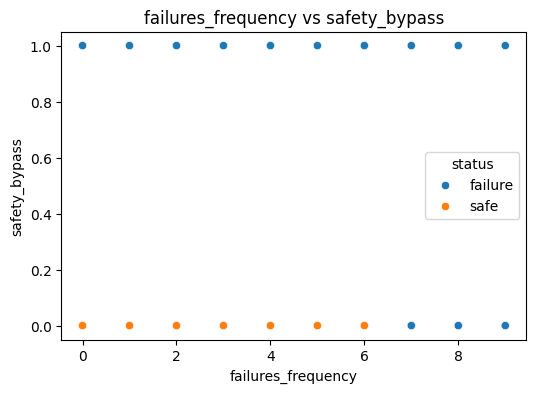

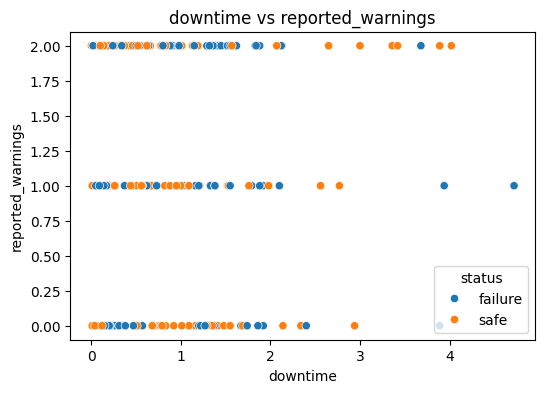

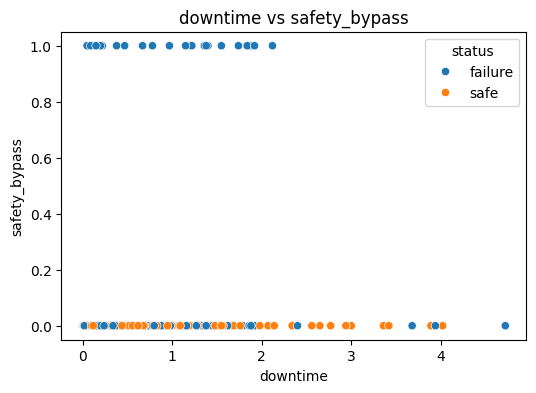

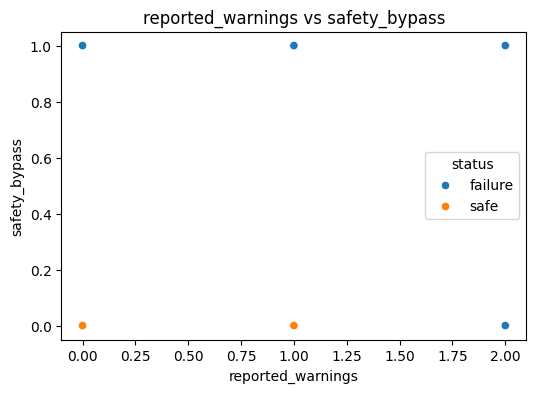

In [16]:
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[numeric_cols[i]], y=df[numeric_cols[j]], hue=df[categorical_cols[0]] if len(categorical_cols)>0 else None)
        plt.title(f"{numeric_cols[i]} vs {numeric_cols[j]}")
        plt.show()


# MULTIVARIATE ANALYSIS

## Correlation Heatmap

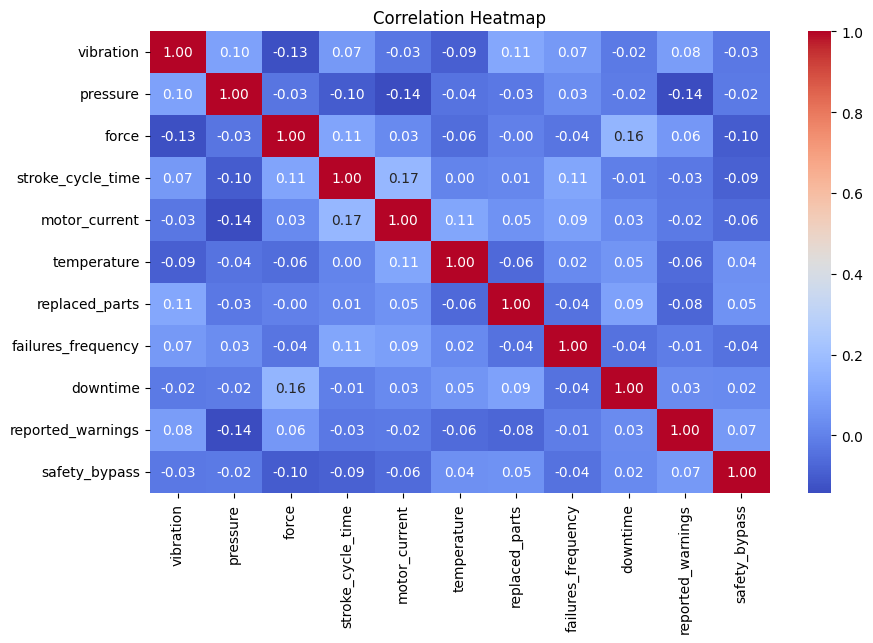

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# OUTLIERS DETECTION(Boxplot)

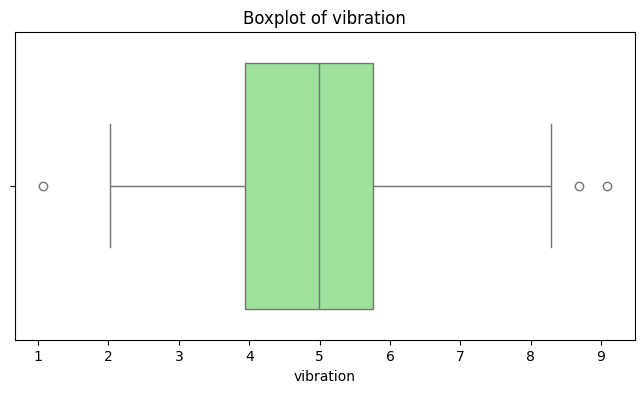

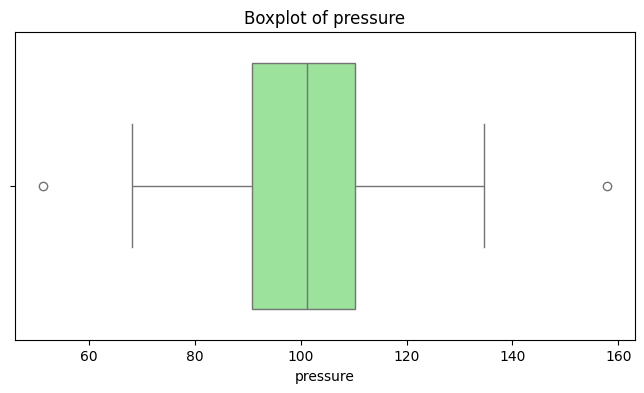

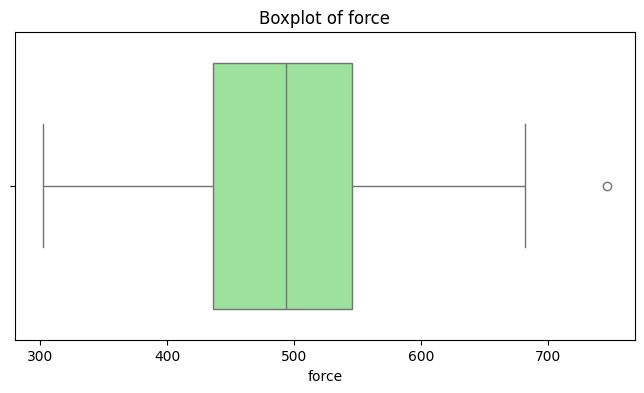

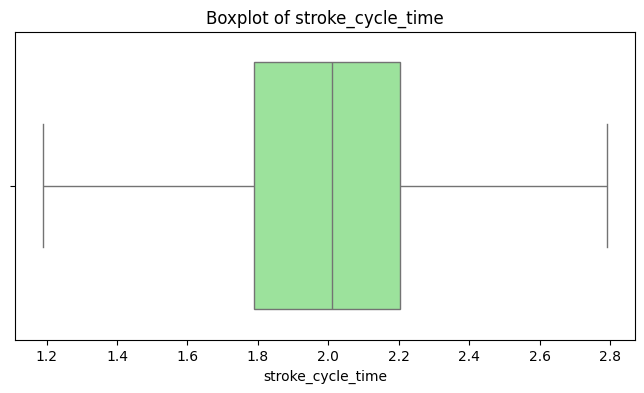

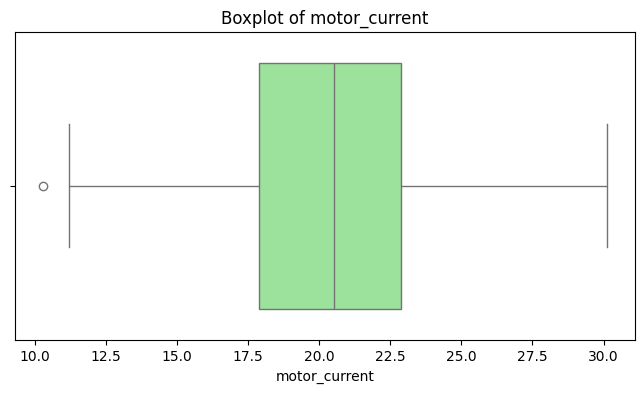

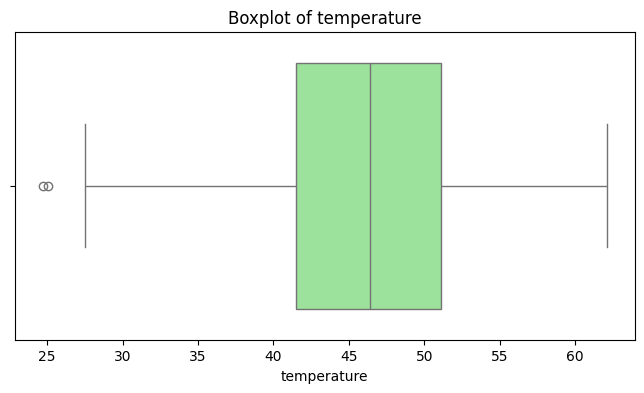

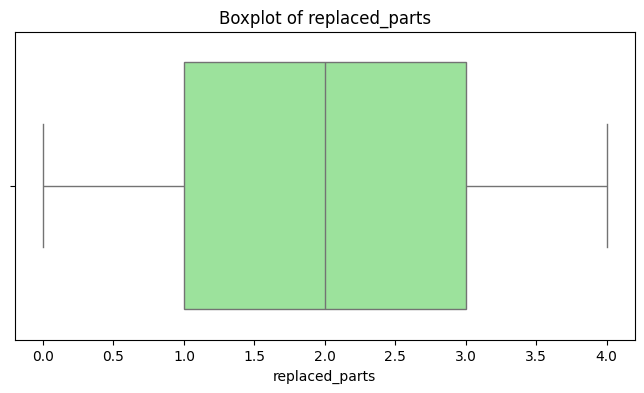

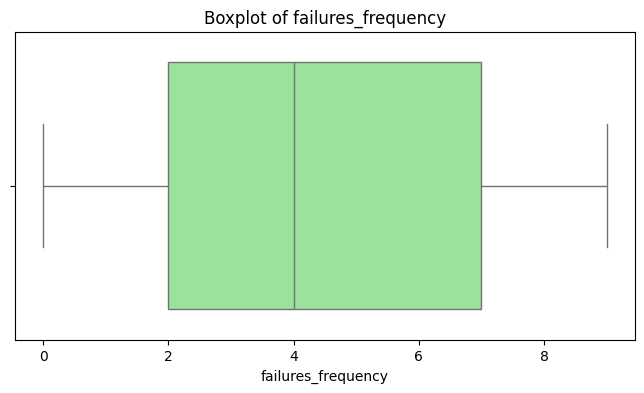

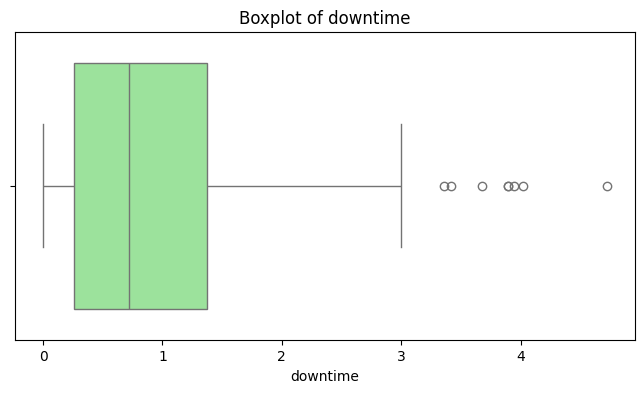

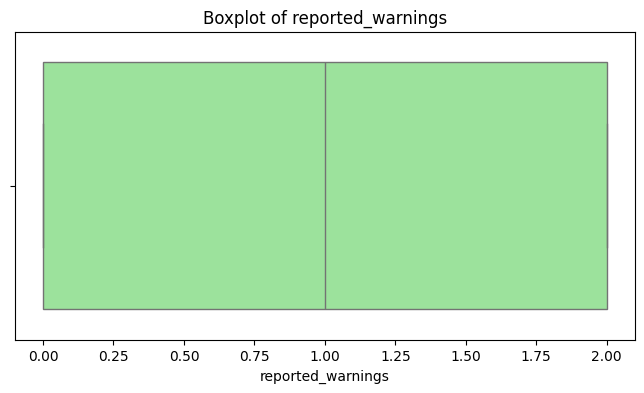

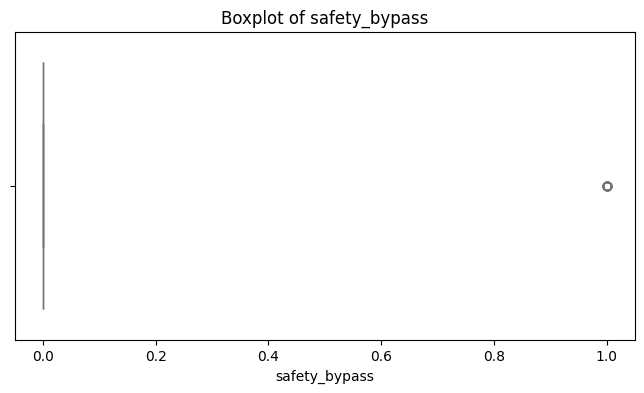

In [18]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.show()

# PLOTLY VISUALIZATION

In [19]:
for col in numeric_cols:
    fig = px.histogram(df, x=col, nbins=20, title=f"Interactive Histogram of {col}", color_discrete_sequence=['#00CED1'])
    fig.show()

In [20]:
from IPython.display import display, HTML

display(HTML("""
<h1 style="
    font-family: 'Comic Sans MS', 'Brush Script MT', cursive;
    color: #0D47A1;   /* Dark Blue */
    text-shadow: 2px 2px 6px #90A4AE;  /* Soft grey-blue shadow */
    text-align: center;
">
 (RANDOM FOREST ALGORITHM)
</h1>
"""))

# Features X and Y

In [21]:
X = df.drop("status", axis=1)
y = df["status"]

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split


In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from IPython.display import display, HTML


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Train random Forest Model

In [29]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
y_pred = rf_model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred) 
cm = confusion_matrix(y_test, y_pred) 
report = classification_report(y_test, y_pred)

In [58]:
print("\n Accuracy:", accuracy) 
print("\n Classification Report:\n", report)


 Accuracy: 0.92

 Classification Report:
               precision    recall  f1-score   support

     failure       1.00      1.00      1.00        20
        safe       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## Confusion Matrix Visualization

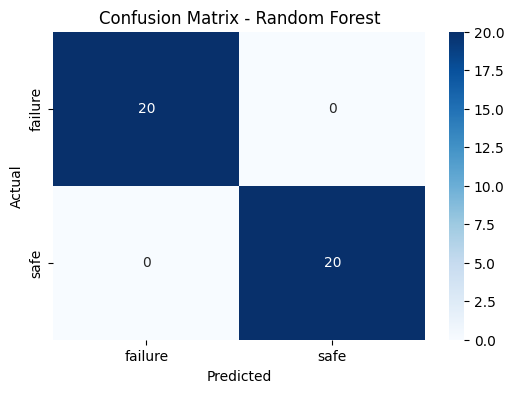

In [35]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Feature Importance

C:\Users\vaish\AppData\Local\Temp\ipykernel_2876\882028368.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




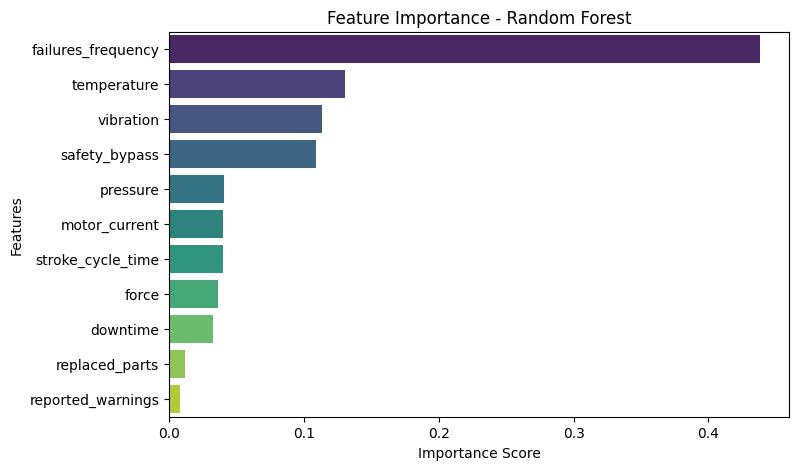

In [36]:
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances[indices], y=X.columns[indices], palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [40]:
from IPython.display import display, HTML

display(HTML("""
<h1 style="
    font-family: 'Comic Sans MS', 'Brush Script MT', cursive;
    color: #0D47A1;   /* Dark Blue */
    text-shadow: 2px 2px 6px #90A4AE;  /* Soft grey-blue shadow */
    text-align: center;
">
SUMMARY
</h1>
"""))

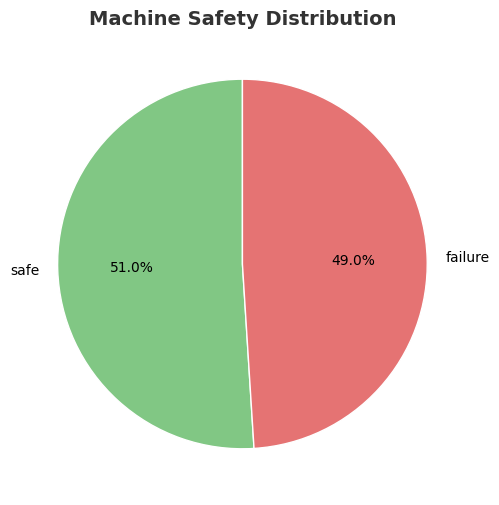

In [43]:
# ==========================
#  Dashboard-style KPI Cards
# ==========================
from IPython.display import display, HTML

status_counts = df["status"].value_counts()
total_machines = status_counts.sum()
failure_rate = (status_counts.get("failure", 0) / total_machines) * 100

cards_html = f"""
<div style="display:flex; gap:20px; font-family:Arial; justify-content:space-between;">

  <!-- SAFE CARD -->
  <div style="flex:1; border:2px solid #2E7D32; border-radius:12px; padding:20px;
              background-color:#F1F8E9; text-align:center; box-shadow:2px 2px 6px #aaa;">
      <h3 style="color:#2E7D32; margin:0;">SAFE MACHINES</h3>
      <p style="font-size:28px; font-weight:bold; color:#1B5E20; margin:10px 0;">
         {status_counts.get('safe', 0)}
      </p>
      <p style="color:#555; font-size:13px;">Operating under normal conditions</p>
  </div>

  <!-- FAILURE CARD -->
  <div style="flex:1; border:2px solid #B71C1C; border-radius:12px; padding:20px;
              background-color:#FFEBEE; text-align:center; box-shadow:2px 2px 6px #aaa;">
      <h3 style="color:#B71C1C; margin:0;">FAILURE MACHINES</h3>
      <p style="font-size:28px; font-weight:bold; color:#C62828; margin:10px 0;">
         {status_counts.get('failure', 0)}
      </p>
      <p style="color:#555; font-size:13px;">Unsafe or faulty state</p>
  </div>

  <!-- OVERVIEW CARD -->
  <div style="flex:1; border:2px solid #1565C0; border-radius:12px; padding:20px;
              background-color:#E3F2FD; text-align:center; box-shadow:2px 2px 6px #aaa;">
      <h3 style="color:#1565C0; margin:0;">OVERVIEW</h3>
      <p style="font-size:22px; font-weight:bold; color:#0D47A1; margin:10px 0;">
         {total_machines} Machines
      </p>
      <p style="font-size:16px; color:#0D47A1; margin:10px 0;">
         Failure Rate: <b>{failure_rate:.1f}%</b>
      </p>
      <p style="color:#555; font-size:13px;">Overall system status</p>
  </div>

</div>
"""

display(HTML(cards_html))

# ==========================
# Pie Chart
# ==========================
plt.figure(figsize=(6,6))
colors = ["#81C784", "#E57373"]  # soft green/red
plt.pie(status_counts, labels=status_counts.index,
        autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={"edgecolor":"white","linewidth":1})
plt.title("Machine Safety Distribution", fontsize=14, weight="bold", color="#333")
plt.show()


